<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/ANN_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense

# Load data from csv file
data = pd.read_csv("Housing.csv")

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
data.shape

(545, 13)

In [37]:
# Prepare data for the model
X = data.drop('price', axis=1)
y = data['price']

# One-hot encode categorical variables
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[0. 1. 1. ... 2. 3. 2.]
 [0. 1. 1. ... 4. 4. 3.]
 [0. 1. 1. ... 2. 2. 2.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 2. 0.]]


In [39]:
# Scale the numerical variables
sc = StandardScaler()
X[:, len(categorical_cols):] = sc.fit_transform(X[:, len(categorical_cols):])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
print(X[1])

[ 0.          1.          1.          0.          1.          0.
  1.         -0.2192645  -1.4726183   1.4726183   0.55403469 -0.55403469
  1.70084013 -0.84488844 -0.6964292   1.75700953  1.40341936  5.40580863
  2.53202371  2.67940935]


In [42]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
print(X_train_scaled[1])

[0.         1.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 0.         0.         1.         0.15065441 0.2        0.
 0.         0.        ]


In [45]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               2688      
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 2s 40ms/step - loss: 26817282965504.0000 - mae: 4787143.0000 - val_loss: 25096508932096.0000 - val_mae: 4740032.0000
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 26817264091136.0000 - mae: 4787140.5000 - val_loss: 25096487960576.0000

In [46]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test MAE:', test_mae)


4/4 [==============================] - 0s 7ms/step - loss: 22568897609728.0000 - mae: 4443086.5000
Test loss: 22568897609728.0
Test MAE: 4443086.5


In [47]:
y_pred = model.predict(X_test)
print("Predictions on Testing Set:", y_pred[:10])

4/4 [==============================] - 0s 3ms/step
Predictions on Testing Set: [[139582.34 ]
 [214463.64 ]
 [131379.73 ]
 [266939.8  ]
 [135640.3  ]
 [227979.25 ]
 [133550.69 ]
 [123905.734]
 [ 49262.086]
 [413128.2  ]]


4/4 [==============================] - 0s 5ms/step


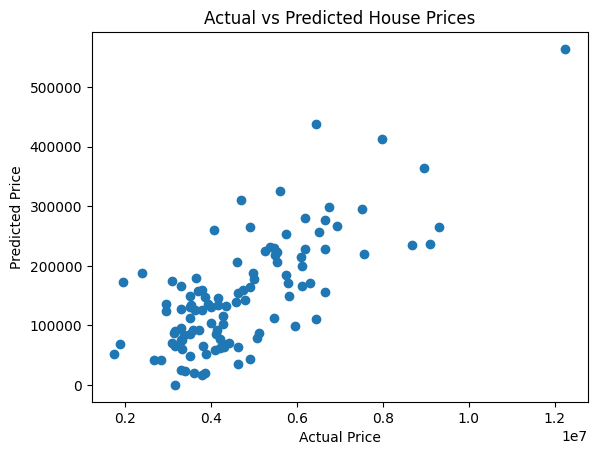

In [48]:
# Dự đoán giá nhà trên tập kiểm tra
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt


# Hiển thị kết quả dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [53]:
# Dự đoán giá nhà cho các giá trị đầu vào mới
new_data = np.array([[5.0, 15, 10000, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,0.2,0.2,0,1,1,1,1]])
new_data_scaled = scaler.transform(new_data)
price = model.predict(new_data_scaled)
print('Predicted price:', price[0][0])

1/1 [==============================] - 0s 42ms/step
Predicted price: 308207100.0
